In [3]:
import pandas as pd

In [5]:
df= pd.read_excel("Crop_recommendation.xlsx",na_values=[' ?','? ','?'])

PermissionError: [Errno 13] Permission denied: 'Crop_recommendation.xlsx'

In [2]:
df.isnull().sum()

NameError: name 'df' is not defined

In [4]:
df.dtypes

N              float64
P              float64
K              float64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [5]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60.0,55.0,0.0,23.004459,82.320763,7.840207,263.964248,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,0.000000,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507,coffee
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610,coffee
2197,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839,coffee
2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293,coffee


In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2161.000000,2104.000000,2059.000000,2199.000000,2199.000000,2185.000000,2200.000000
mean,50.366960,53.672053,49.055367,25.619664,71.254084,6.470420,102.961693
std,37.173779,33.475591,52.020468,5.062358,22.614824,0.774668,55.109932
min,0.000000,0.000000,0.000000,8.825675,0.000000,3.504752,0.000000
25%,21.000000,28.000000,21.000000,22.770560,60.124723,5.972715,64.236408
50%,37.000000,52.000000,32.000000,25.600337,80.457444,6.425420,94.651497
75%,85.000000,68.000000,50.000000,28.561810,89.935793,6.924042,123.026982
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
for i in df.columns:
    if df[i].dtypes=='O':
        df[i].fillna(df[i].mode()[0],inplace=True)
    elif df[i].dtypes!='O' and df[i].nunique()<((len(df)/100)*10):
        df[i].fillna(df[i].mode()[0],inplace=True)
    else:
        df[i].fillna(df[i].median(),inplace=True)

In [8]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
lb= LabelEncoder()
df['crop_encode']=lb.fit_transform(df['label'])

In [12]:
z=df.drop('label',axis=1).corr()

In [13]:
#importing required libraries
import seaborn as sns
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

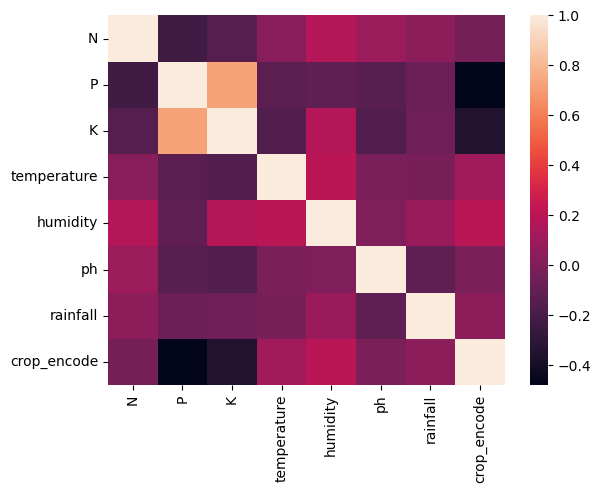

In [14]:
# Creating the heatmap
sns.heatmap(z)
plt.show 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [16]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,crop_encode
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice,20
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,226.655537,rice,20
2,60.0,55.0,0.0,23.004459,82.320763,7.840207,263.964248,rice,20
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,0.000000,rice,20
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...,...
2195,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293,coffee,5


In [17]:
x=df.drop(['label','crop_encode'],axis=1) # Replace 'target_column' with the name of your target column

In [18]:
# Let's say 'X' are your features and 'y' is the target variable
y = df['label']

In [19]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2529)

In [20]:
# Creating a logistic regression model
lg = LogisticRegression()
lg.fit(x_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
lg.score(x_test,y_test)

0.9036363636363637

In [22]:
#another way to check

In [23]:
# Making predictions
predictions = lg.predict(x_test)


In [24]:
# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9036363636363637


In [25]:
import pickle

In [26]:
with open('model.pkl','wb') as model_file:
    pickle.dump(lg,model_file)